In [96]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Clustering analysis

Use various clustering techniques to identify a good subset of questions.

---

In [97]:
import os
import sys
from contextlib import suppress

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
df = pd.read_csv("../data/processed/1988.csv", index_col=0)

In [99]:
df.head()

,PartyID,Abortion,MoralRelativism,NewerLifestyles,MoralTolerance,TraditionalFamilies,GayJobDiscrimination,NationalHealthInsurance,StandardOfLiving,ServicesVsSpending,AffirmativeAction,RacialResentment1,RacialResentment2,RacialResentment3,RacialResentment4
0,-1.0,1.0,-2.0,1.0,-2.0,1.0,-5.0,-2.0,-2.0,6.0,-4.0,1.0,-4.0,1.0,-4.0
1,-4.0,4.0,NaN,2.0,-2.0,2.0,-5.0,NaN,NaN,5.0,-2.0,1.0,-4.0,2.0,-4.0
2,-5.0,4.0,NaN,NaN,NaN,NaN,NaN,-7.0,-5.0,4.0,NaN,NaN,NaN,NaN,NaN
3,-2.0,2.0,-5.0,1.0,-2.0,2.0,-1.0,-3.0,-3.0,3.0,-5.0,4.0,-2.0,2.0,-2.0
4,-5.0,2.0,NaN,4.0,-2.0,2.0,-1.0,-6.0,-4.0,4.0,-5.0,4.0,-4.0,4.0,-1.0


---

## Correlations in data

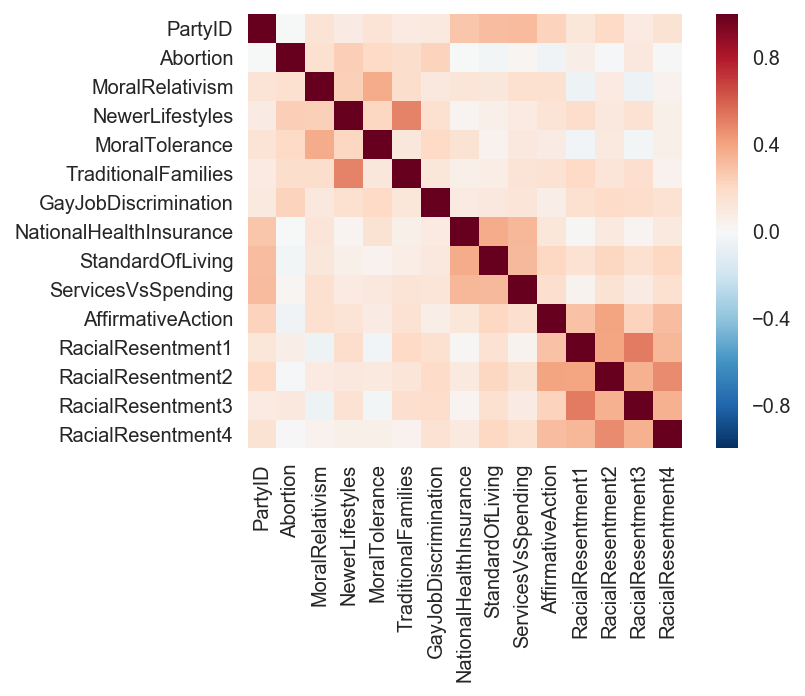

In [100]:
# Spearman is recommended for ordinal data.
correlations = df.corr(method='spearman')
sns.heatmap(correlations,
           square=True);

Note that if we were to scale the data, the correlation matrix would be unchanged.

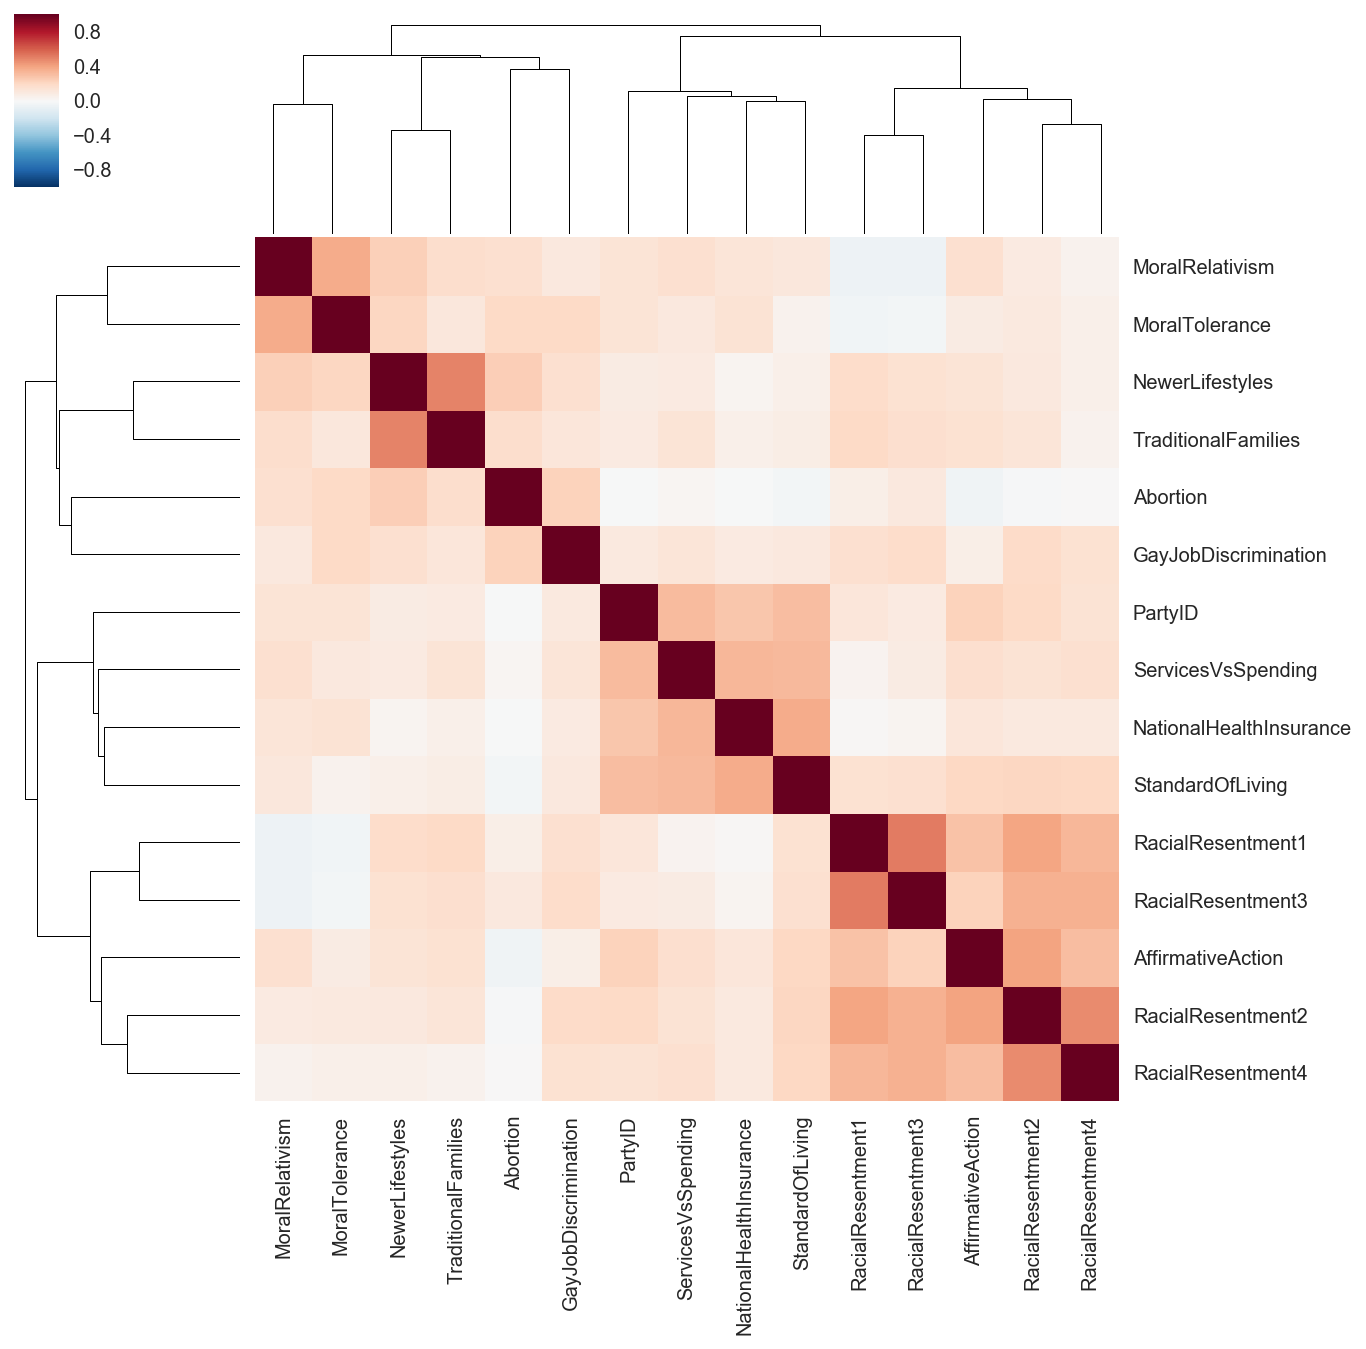

In [101]:
import warnings
with warnings.catch_warnings():   
    warnings.simplefilter("ignore")
    cg = sns.clustermap(correlations, square=True)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),
             rotation=0);  # Fix rotation of y-labels.

**UPDATE ME**

The strongest clusters were:

- 665: who did you vote for?
- 796: allow abortion?
- 911: favor strict gun control?
- 757: is poverty structural?

and 

- 273: public vs private insurance
- 241: should gov't guarantee standard of living
- 264: should we aid minorities

## Principal component analysis

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer, StandardScaler

imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df)
_scaled = scaler_pipeline.transform(df)

### Explained variance

How much of the variance in the data is explained by each successive component?

In [103]:
plot_explained_variance(pca)

### Biplot

A scatterplot projected onto the first two principal components.

In [104]:
data_scaled = pd.DataFrame(_scaled, columns=df.columns)
triplot(pca, data_scaled, title='ANES 1988 Biplot', color=data_scaled.PartyID)

In [105]:
biplot(pca, data_scaled, title='ANES 1988 Biplot', color=data_scaled.PartyID)

In [106]:
pca.explained_variance_

array([ 3.12557047,  1.80979391,  1.63405325,  1.08143584,  1.03948921,
        0.76533091,  0.75989747,  0.73285526,  0.69672682,  0.65166945,
        0.63927217,  0.56624292,  0.54347199,  0.49666228,  0.45752805])

In [107]:
sorted(list(zip(df.columns, pca.components_[0])), key=lambda x: np.abs(x[1]), reverse=True)

[('RacialResentment2', 0.37007035579551351),
 ('RacialResentment1', 0.32899046764511641),
 ('RacialResentment4', 0.32480346738295207),
 ('RacialResentment3', 0.32017136367606658),
 ('AffirmativeAction', 0.31155470305156063),
 ('StandardOfLiving', 0.25882300910940059),
 ('PartyID', 0.25666585700070832),
 ('NewerLifestyles', 0.23392240357521976),
 ('TraditionalFamilies', 0.2297485712653195),
 ('ServicesVsSpending', 0.22649468392313885),
 ('GayJobDiscrimination', 0.21483230844082304),
 ('NationalHealthInsurance', 0.18914257917131846),
 ('MoralRelativism', 0.18337371074905179),
 ('MoralTolerance', 0.18016203278669229),
 ('Abortion', 0.10028516158606293)]